## Degree Centrality LCC

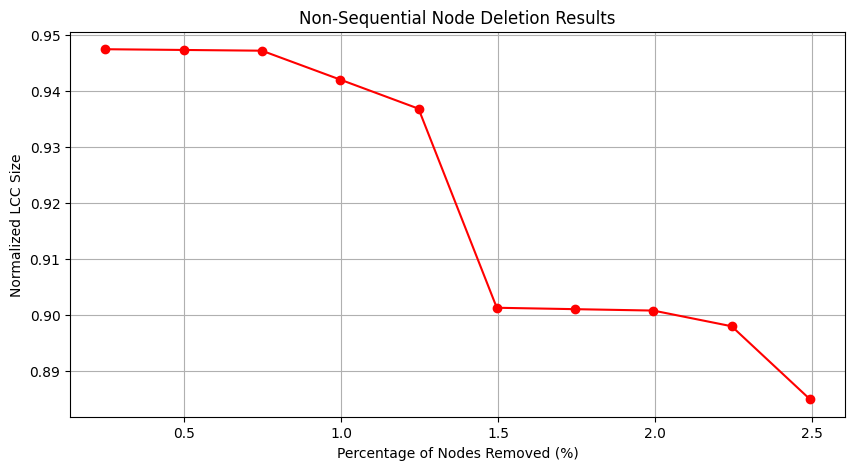

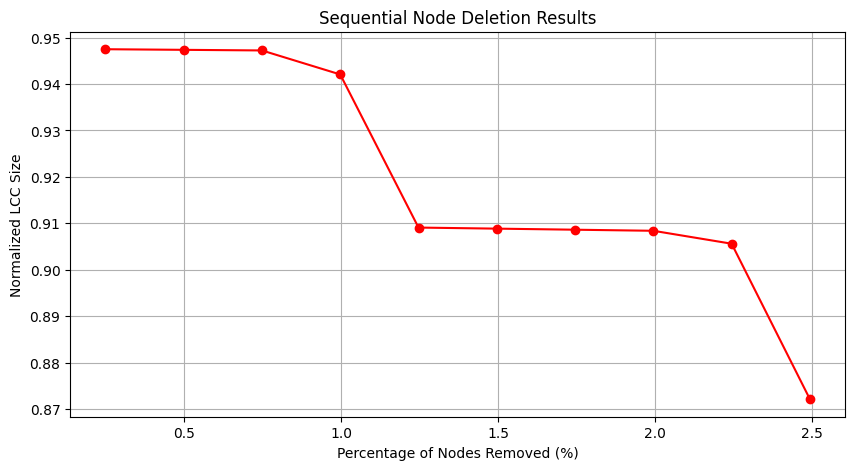

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

# Read the graph
G = nx.read_graphml('london.graph.xml')
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# Calculate degree centrality and set as node attribute
deg_london = nx.degree_centrality(G)
nx.set_node_attributes(G, dict(deg_london), 'degree')

# Prepare DataFrame with station names and degrees
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

def calculate_normalized_lcc(graph):
    if len(graph) == 0:
        return 0
    largest_cc = max(nx.connected_components(graph), key=len)
    return len(largest_cc) / len(graph.nodes())

def unordered_deletion(graph, sorted_nodes, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i, node in enumerate(sorted_nodes[:n]):
        graph_copy.remove_node(node)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def sequential_deletion(graph, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i in range(n):
        deg_centrality = nx.degree_centrality(graph_copy)
        sorted_nodes = sorted(deg_centrality, key=deg_centrality.get, reverse=True)
        if not sorted_nodes:
            break
        node_to_remove = sorted_nodes[0]
        graph_copy.remove_node(node_to_remove)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def plot_results(results, title):
    removed_percentages = [res[0] for res in results]
    lcc_sizes = [res[1] for res in results]

    plt.figure(figsize=(10, 5))
    plt.plot(removed_percentages, lcc_sizes, marker='o', color='red')
    plt.title(title)
    plt.xlabel("Percentage of Nodes Removed (%)")
    plt.ylabel("Normalized LCC Size")
    plt.grid(True)
    plt.show()

# Example usage of the modified functions
G_copy = G.copy()  # Making a copy of the original graph to use in deletions
unordered_results = unordered_deletion(G_copy, sorted(deg_london, key=deg_london.get, reverse=True), n=10)
plot_results(unordered_results, "Non-Sequential Node Deletion Results")

# For sequential deletion
G_copy = G.copy()  # Resetting the graph to its original state
sequential_results = sequential_deletion(G_copy, n=10)
plot_results(sequential_results, "Sequential Node Deletion Results")


### Betweenness Centrality

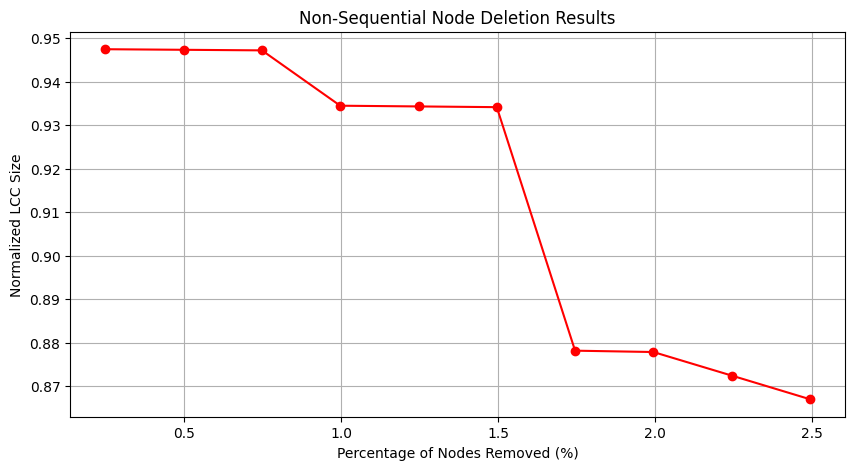

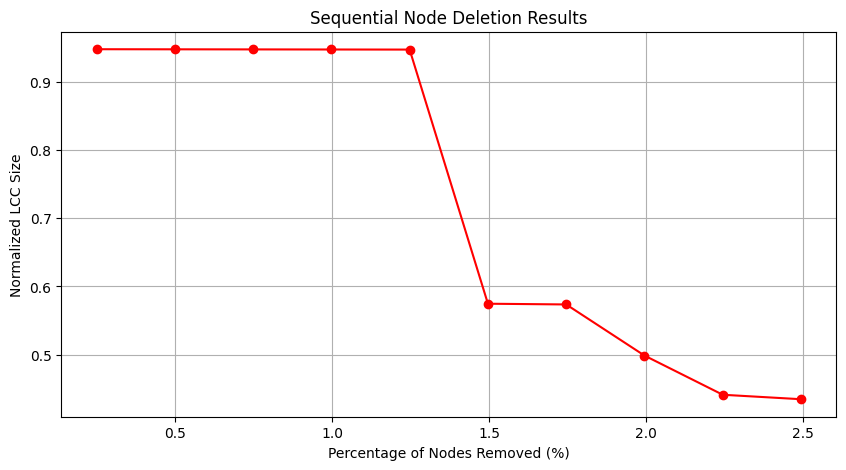

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

# Read the graph
G = nx.read_graphml('london.graph.xml')
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# Calculate betweenness centrality and set as node attribute
betw_london = nx.betweenness_centrality(G)
nx.set_node_attributes(G, dict(betw_london), 'betweenness')

# Prepare DataFrame with station names and betweenness centrality values
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness'] = pd.Series(nx.get_node_attributes(G, 'betweenness'))

def calculate_normalized_lcc(graph):
    if len(graph) == 0:
        return 0
    largest_cc = max(nx.connected_components(graph), key=len)
    return len(largest_cc) / len(graph.nodes())

def unordered_deletion(graph, sorted_nodes, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i, node in enumerate(sorted_nodes[:n]):
        graph_copy.remove_node(node)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def sequential_deletion(graph, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i in range(n):
        betweenness = nx.betweenness_centrality(graph_copy)
        sorted_nodes = sorted(betweenness, key=betweenness.get, reverse=True)
        if not sorted_nodes:
            break
        node_to_remove = sorted_nodes[0]
        graph_copy.remove_node(node_to_remove)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def plot_results(results, title):
    removed_percentages = [res[0] for res in results]
    lcc_sizes = [res[1] for res in results]

    plt.figure(figsize=(10, 5))
    plt.plot(removed_percentages, lcc_sizes, marker='o', color='red')
    plt.title(title)
    plt.xlabel("Percentage of Nodes Removed (%)")
    plt.ylabel("Normalized LCC Size")
    plt.grid(True)
    plt.show()

# Example usage of the modified functions
G_copy = G.copy()  # Making a copy of the original graph to use in deletions
unordered_results = unordered_deletion(G_copy, sorted(betw_london, key=betw_london.get, reverse=True), n=10)
plot_results(unordered_results, "Non-Sequential Node Deletion Results")

# For sequential deletion
G_copy = G.copy()  # Resetting the graph to its original state
sequential_results = sequential_deletion(G_copy, n=10)
plot_results(sequential_results, "Sequential Node Deletion Results")


### Closeness Centrality

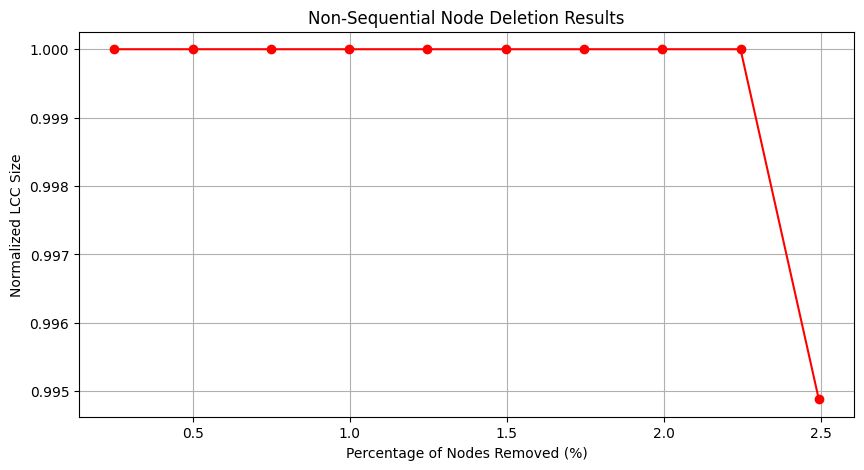

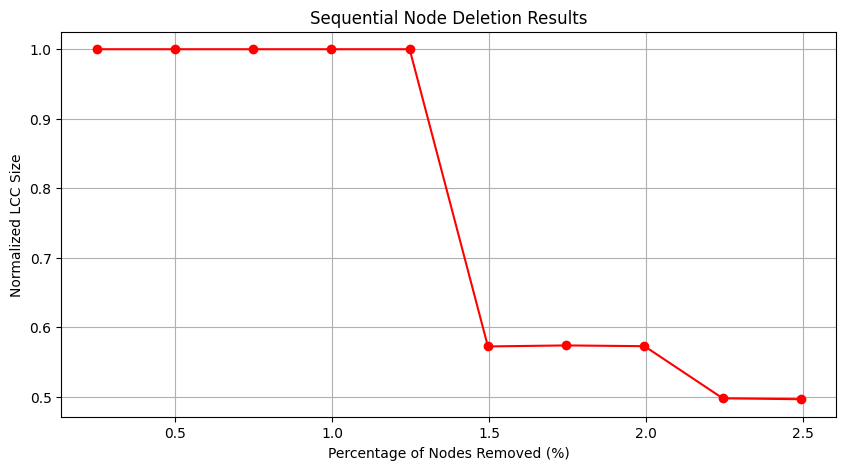

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

# Read the graph
G = nx.read_graphml('london.graph.xml')
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# Calculate closeness centrality and set as node attribute
closeness_london = nx.closeness_centrality(G)
nx.set_node_attributes(G, dict(closeness_london), 'closeness')

# Prepare DataFrame with station names and closeness values
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness'] = pd.Series(nx.get_node_attributes(G, 'closeness'))

def calculate_normalized_lcc(graph):
    if len(graph) == 0:
        return 0
    largest_cc = max(nx.connected_components(graph), key=len)
    return len(largest_cc) / len(graph.nodes())

def unordered_deletion(graph, sorted_nodes, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i, node in enumerate(sorted_nodes[:n]):
        graph_copy.remove_node(node)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def sequential_deletion(graph, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i in range(n):
        closeness_centrality = nx.closeness_centrality(graph_copy)
        sorted_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)
        if not sorted_nodes:
            break
        node_to_remove = sorted_nodes[0]
        graph_copy.remove_node(node_to_remove)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def plot_results(results, title):
    removed_percentages = [res[0] for res in results]
    lcc_sizes = [res[1] for res in results]

    plt.figure(figsize=(10, 5))
    plt.plot(removed_percentages, lcc_sizes, marker='o', color='red')
    plt.title(title)
    plt.xlabel("Percentage of Nodes Removed (%)")
    plt.ylabel("Normalized LCC Size")
    plt.grid(True)
    plt.show()

# Example usage of the modified functions
G_copy = G.copy()  # Making a copy of the original graph to use in deletions
unordered_results = unordered_deletion(G_copy, sorted(closeness_london, key=closeness_london.get, reverse=True), n=10)
plot_results(unordered_results, "Non-Sequential Node Deletion Results")

# For sequential deletion
G_copy = G.copy()  # Resetting the graph to its original state
sequential_results = sequential_deletion(G_copy, n=10)
plot_results(sequential_results, "Sequential Node Deletion Results")


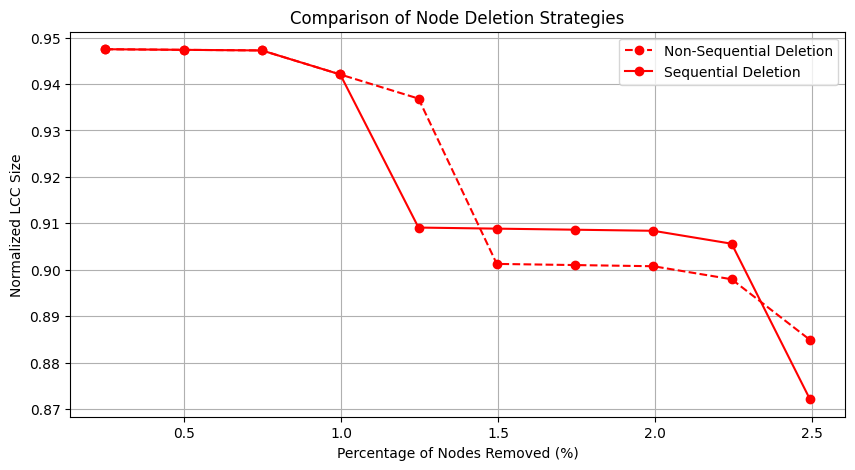

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

# Read the graph
G = nx.read_graphml('london.graph.xml')
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# Calculate degree centrality and set as node attribute
deg_london = nx.degree_centrality(G)
nx.set_node_attributes(G, dict(deg_london), 'degree')

# Prepare DataFrame with station names and degrees
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

def calculate_normalized_lcc(graph):
    if len(graph) == 0:
        return 0
    largest_cc = max(nx.connected_components(graph), key=len)
    return len(largest_cc) / len(graph.nodes())

def unordered_deletion(graph, sorted_nodes, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i, node in enumerate(sorted_nodes[:n]):
        if node not in graph_copy:
            continue
        graph_copy.remove_node(node)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def sequential_deletion(graph, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i in range(n):
        deg_centrality = nx.degree_centrality(graph_copy)
        sorted_nodes = sorted(deg_centrality, key=deg_centrality.get, reverse=True)
        if not sorted_nodes or sorted_nodes[0] not in graph_copy:
            break
        node_to_remove = sorted_nodes[0]
        graph_copy.remove_node(node_to_remove)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def plot_results_combined(unordered_results, sequential_results):
    plt.figure(figsize=(10, 5))

    # Plot for unordered deletion
    unordered_removed_percentages = [res[0] for res in unordered_results]
    unordered_lcc_sizes = [res[1] for res in unordered_results]
    plt.plot(unordered_removed_percentages, unordered_lcc_sizes, marker='o', linestyle='--', color='red', label='Non-Sequential Deletion')

    # Plot for sequential deletion
    sequential_removed_percentages = [res[0] for res in sequential_results]
    sequential_lcc_sizes = [res[1] for res in sequential_results]
    plt.plot(sequential_removed_percentages, sequential_lcc_sizes, marker='o', linestyle='-', color='red', label='Sequential Deletion')

    plt.title("Comparison of Node Deletion Strategies")
    plt.xlabel("Percentage of Nodes Removed (%)")
    plt.ylabel("Normalized LCC Size")
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
G_copy = G.copy()  # Making a copy of the original graph to use in deletions
unordered_results = unordered_deletion(G_copy, sorted(deg_london, key=deg_london.get, reverse=True), n=10)

# For sequential deletion
G_copy = G.copy()  # Resetting the graph to its original state
sequential_results = sequential_deletion(G_copy, n=10)

# Plotting combined results
plot_results_combined(unordered_results, sequential_results)


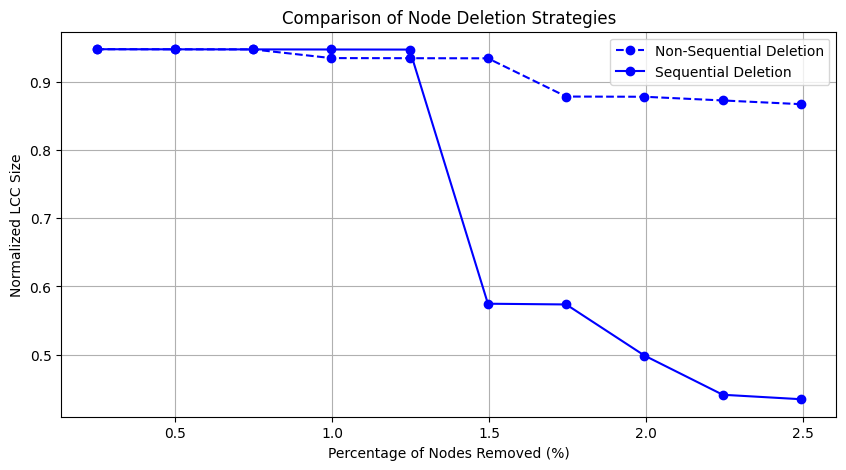

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

# Read the graph
G = nx.read_graphml('london.graph.xml')
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# Calculate betweenness centrality and set as node attribute
betw_london = nx.betweenness_centrality(G)
nx.set_node_attributes(G, dict(betw_london), 'betweenness')

# Prepare DataFrame with station names and betweenness centrality values
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness'] = pd.Series(nx.get_node_attributes(G, 'betweenness'))

def calculate_normalized_lcc(graph):
    if len(graph) == 0:
        return 0
    largest_cc = max(nx.connected_components(graph), key=len)
    return len(largest_cc) / len(graph.nodes())

def unordered_deletion(graph, sorted_nodes, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i, node in enumerate(sorted_nodes[:n]):
        graph_copy.remove_node(node)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def sequential_deletion(graph, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i in range(n):
        betweenness = nx.betweenness_centrality(graph_copy)
        sorted_nodes = sorted(betweenness, key=betweenness.get, reverse=True)
        if not sorted_nodes:
            break
        node_to_remove = sorted_nodes[0]
        graph_copy.remove_node(node_to_remove)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def plot_results_combined(unordered_results, sequential_results):
    plt.figure(figsize=(10, 5))

    # Plot for unordered deletion
    unordered_removed_percentages = [res[0] for res in unordered_results]
    unordered_lcc_sizes = [res[1] for res in unordered_results]
    plt.plot(unordered_removed_percentages, unordered_lcc_sizes, marker='o',linestyle='--',color='blue', label='Non-Sequential Deletion')

    # Plot for sequential deletion
    sequential_removed_percentages = [res[0] for res in sequential_results]
    sequential_lcc_sizes = [res[1] for res in sequential_results]
    plt.plot(sequential_removed_percentages, sequential_lcc_sizes, marker='o', linestyle='-',color='blue', label='Sequential Deletion')

    plt.title("Comparison of Node Deletion Strategies")
    plt.xlabel("Percentage of Nodes Removed (%)")
    plt.ylabel("Normalized LCC Size")
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage of the modified functions
G_copy = G.copy()  # Making a copy of the original graph to use in deletions
unordered_results = unordered_deletion(G_copy, sorted(betw_london, key=betw_london.get, reverse=True), n=10)

# For sequential deletion
G_copy = G.copy()  # Resetting the graph to its original state
sequential_results = sequential_deletion(G_copy, n=10)

# Plotting combined results
plot_results_combined(unordered_results, sequential_results)


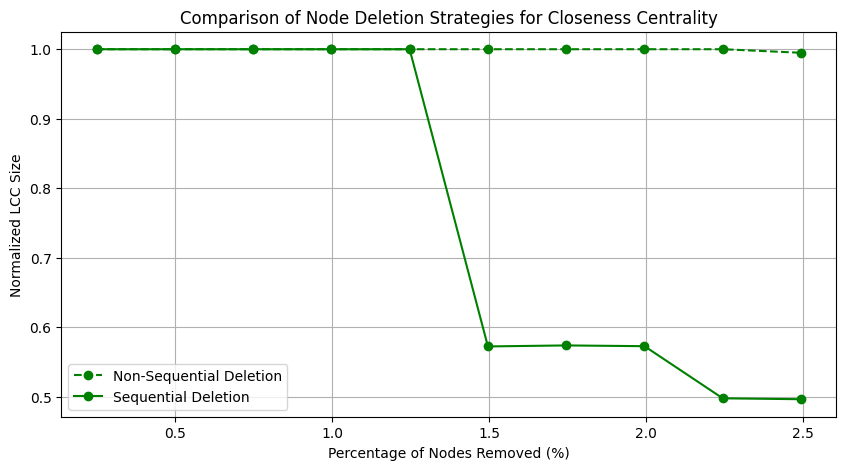

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

# Read the graph
G = nx.read_graphml('london.graph.xml')
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# Calculate closeness centrality and set as node attribute
closeness_london = nx.closeness_centrality(G)
nx.set_node_attributes(G, dict(closeness_london), 'closeness')

# Prepare DataFrame with station names and closeness values
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness'] = pd.Series(nx.get_node_attributes(G, 'closeness'))

def calculate_normalized_lcc(graph):
    if len(graph) == 0:
        return 0
    largest_cc = max(nx.connected_components(graph), key=len)
    return len(largest_cc) / len(graph.nodes())

def unordered_deletion(graph, sorted_nodes, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i, node in enumerate(sorted_nodes[:n]):
        graph_copy.remove_node(node)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def sequential_deletion(graph, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i in range(n):
        closeness_centrality = nx.closeness_centrality(graph_copy)
        sorted_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)
        if not sorted_nodes:
            break
        node_to_remove = sorted_nodes[0]
        graph_copy.remove_node(node_to_remove)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def plot_results_combined(unordered_results, sequential_results):
    plt.figure(figsize=(10, 5))

    # Plot for unordered deletion
    unordered_removed_percentages = [res[0] for res in unordered_results]
    unordered_lcc_sizes = [res[1] for res in unordered_results]
    plt.plot(unordered_removed_percentages, unordered_lcc_sizes, marker='o', linestyle='--', color='green', label='Non-Sequential Deletion')

    # Plot for sequential deletion
    sequential_removed_percentages = [res[0] for res in sequential_results]
    sequential_lcc_sizes = [res[1] for res in sequential_results]
    plt.plot(sequential_removed_percentages, sequential_lcc_sizes, marker='o', linestyle='-', color='green', label='Sequential Deletion')

    plt.title("Comparison of Node Deletion Strategies for Closeness Centrality")
    plt.xlabel("Percentage of Nodes Removed (%)")
    plt.ylabel("Normalized LCC Size")
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
G_copy = G.copy()  # Making a copy of the original graph to use in deletions
unordered_results = unordered_deletion(G_copy, sorted(closeness_london, key=closeness_london.get, reverse=True), n=10)

# For sequential deletion
G_copy = G.copy()  # Resetting the graph to its original state
sequential_results = sequential_deletion(G_copy, n=10)

# Plotting combined results
plot_results_combined(unordered_results, sequential_results)


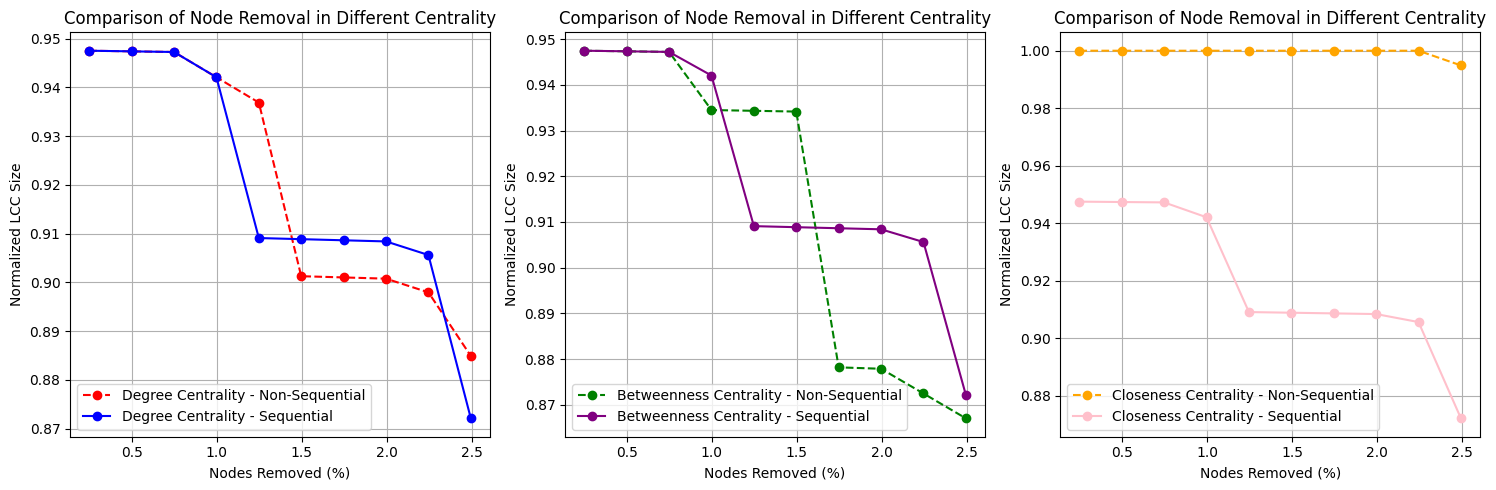

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Read the graph
G = nx.read_graphml('london.graph.xml')
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# Calculate degree centrality, betweenness centrality, and closeness centrality
deg_london = nx.degree_centrality(G)
betw_london = nx.betweenness_centrality(G)
closeness_london = nx.closeness_centrality(G)

# Prepare DataFrame with station names and centrality measures
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))
df['betweenness'] = pd.Series(nx.get_node_attributes(G, 'betweenness'))
df['closeness'] = pd.Series(nx.get_node_attributes(G, 'closeness'))

def calculate_normalized_lcc(graph):
    if len(graph) == 0:
        return 0
    largest_cc = max(nx.connected_components(graph), key=len)
    return len(largest_cc) / len(graph.nodes())

def unordered_deletion(graph, sorted_nodes, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i, node in enumerate(sorted_nodes[:n]):
        if node not in graph_copy:
            continue
        graph_copy.remove_node(node)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def sequential_deletion(graph, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i in range(n):
        deg_centrality = nx.degree_centrality(graph_copy)
        sorted_nodes = sorted(deg_centrality, key=deg_centrality.get, reverse=True)
        if not sorted_nodes or sorted_nodes[0] not in graph_copy:
            break
        node_to_remove = sorted_nodes[0]
        graph_copy.remove_node(node_to_remove)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def plot_results(ax, results, color, linestyle, label):
    removed_percentages = [res[0] for res in results]
    lcc_sizes = [res[1] for res in results]
    ax.plot(removed_percentages, lcc_sizes, marker='o', linestyle=linestyle, color=color, label=label)

# Example usage
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# For degree centrality
G_copy = G.copy()
unordered_results_deg = unordered_deletion(G_copy, sorted(deg_london, key=deg_london.get, reverse=True), n=10)
sequential_results_deg = sequential_deletion(G_copy, n=10)
plot_results(axes[0], unordered_results_deg, 'red', '--', 'Degree Centrality - Non-Sequential')
plot_results(axes[0], sequential_results_deg, 'blue', '-', 'Degree Centrality - Sequential')

# For betweenness centrality
G_copy = G.copy()
unordered_results_betw = unordered_deletion(G_copy, sorted(betw_london, key=betw_london.get, reverse=True), n=10)
sequential_results_betw = sequential_deletion(G_copy, n=10)
plot_results(axes[1], unordered_results_betw, 'green', '--', 'Betweenness Centrality - Non-Sequential')
plot_results(axes[1], sequential_results_betw, 'purple', '-', 'Betweenness Centrality - Sequential')

# For closeness centrality
G_copy = G.copy()
unordered_results_closeness = unordered_deletion(G_copy, sorted(closeness_london, key=closeness_london.get, reverse=True), n=10)
sequential_results_closeness = sequential_deletion(G_copy, n=10)
plot_results(axes[2], unordered_results_closeness, 'orange', '--', 'Closeness Centrality - Non-Sequential')
plot_results(axes[2], sequential_results_closeness, 'pink', '-', 'Closeness Centrality - Sequential')

# Set titles and labels
for ax in axes:
    ax.set_title("Comparison of Node Removal in Different Centrality")
    ax.set_xlabel("Nodes Removed (%)")
    ax.set_ylabel("Normalized LCC Size")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


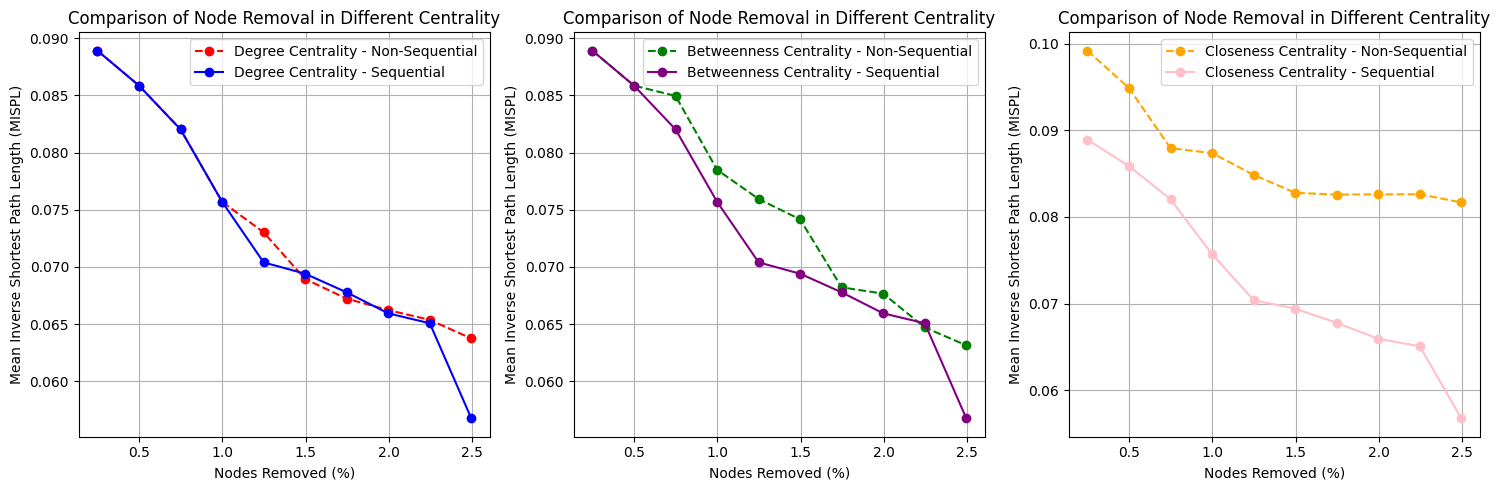

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Function to calculate mean inverse shortest path length
def calculate_mean_inverse_shortest_path_length(graph):
    if len(graph) <= 1:
        return 0
    N = len(graph)
    inverse_path_length_sum = 0.0
    for j in graph.nodes():
        for k in graph.nodes():
            if j != k:
                try:
                    shortest_path_length = nx.shortest_path_length(graph, source=j, target=k)
                    inverse_path_length_sum += 1 / shortest_path_length
                except nx.NetworkXNoPath:
                    # If there is no path between j and k, the inverse shortest path length is 0.
                    continue
    mean_inverse_path_length = inverse_path_length_sum / (N * (N - 1))
    return mean_inverse_path_length

# Read the graph
G = nx.read_graphml('london.graph.xml')
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# Calculate degree centrality, betweenness centrality, and closeness centrality
deg_london = nx.degree_centrality(G)
betw_london = nx.betweenness_centrality(G)
closeness_london = nx.closeness_centrality(G)

# Prepare DataFrame with station names and centrality measures
df = pd.DataFrame(index=G.nodes())
df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(deg_london)
df['betweenness'] = pd.Series(betw_london)
df['closeness'] = pd.Series(closeness_london)

# Sequential and unordered node removal functions
def sequential_deletion(graph, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i in range(n):
        deg_centrality = nx.degree_centrality(graph_copy)
        sorted_nodes = sorted(deg_centrality, key=deg_centrality.get, reverse=True)
        if not sorted_nodes or sorted_nodes[0] not in graph_copy:
            break
        node_to_remove = sorted_nodes[0]
        graph_copy.remove_node(node_to_remove)
        avg_inv_path_length = calculate_mean_inverse_shortest_path_length(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, avg_inv_path_length))
    return results

def unordered_deletion(graph, sorted_nodes, n=10):
    graph_copy = graph.copy()
    total_nodes = len(graph)
    results = []
    for i, node in enumerate(sorted_nodes[:n]):
        if node not in graph_copy:
            continue
        graph_copy.remove_node(node)
        avg_inv_path_length = calculate_mean_inverse_shortest_path_length(graph_copy)
        removed_percentage = (i + 1) / total_nodes * 100
        results.append((removed_percentage, avg_inv_path_length))
    return results

# Plotting function remains the same
def plot_results(ax, results, color, linestyle, label):
    removed_percentages = [res[0] for res in results]
    avg_inv_path_lengths = [res[1] for res in results]
    ax.plot(removed_percentages, avg_inv_path_lengths, marker='o', linestyle=linestyle, color=color, label=label)

# Example usage
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# For degree centrality
G_copy = G.copy()
unordered_results_deg = unordered_deletion(G_copy, sorted(deg_london, key=deg_london.get, reverse=True), n=10)
sequential_results_deg = sequential_deletion(G_copy, n=10)
plot_results(axes[0], unordered_results_deg, 'red', '--', 'Degree Centrality - Non-Sequential')
plot_results(axes[0], sequential_results_deg, 'blue', '-', 'Degree Centrality - Sequential')

# For betweenness centrality
G_copy = G.copy()
unordered_results_betw = unordered_deletion(G_copy, sorted(betw_london, key=betw_london.get, reverse=True), n=10)
sequential_results_betw = sequential_deletion(G_copy, n=10)
plot_results(axes[1], unordered_results_betw, 'green', '--', 'Betweenness Centrality - Non-Sequential')
plot_results(axes[1], sequential_results_betw, 'purple', '-', 'Betweenness Centrality - Sequential')

# For closeness centrality
G_copy = G.copy()
unordered_results_closeness = unordered_deletion(G_copy, sorted(closeness_london, key=closeness_london.get, reverse=True), n=10)
sequential_results_closeness = sequential_deletion(G_copy, n=10)
plot_results(axes[2], unordered_results_closeness, 'orange', '--', 'Closeness Centrality - Non-Sequential')
plot_results(axes[2], sequential_results_closeness, 'pink', '-', 'Closeness Centrality - Sequential')

# Set titles and labels
for ax in axes:
    ax.set_title("Comparison of Node Removal in Different Centrality")
    ax.set_xlabel("Nodes Removed (%)")
    ax.set_ylabel("Mean Inverse Shortest Path Length (MISPL)")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

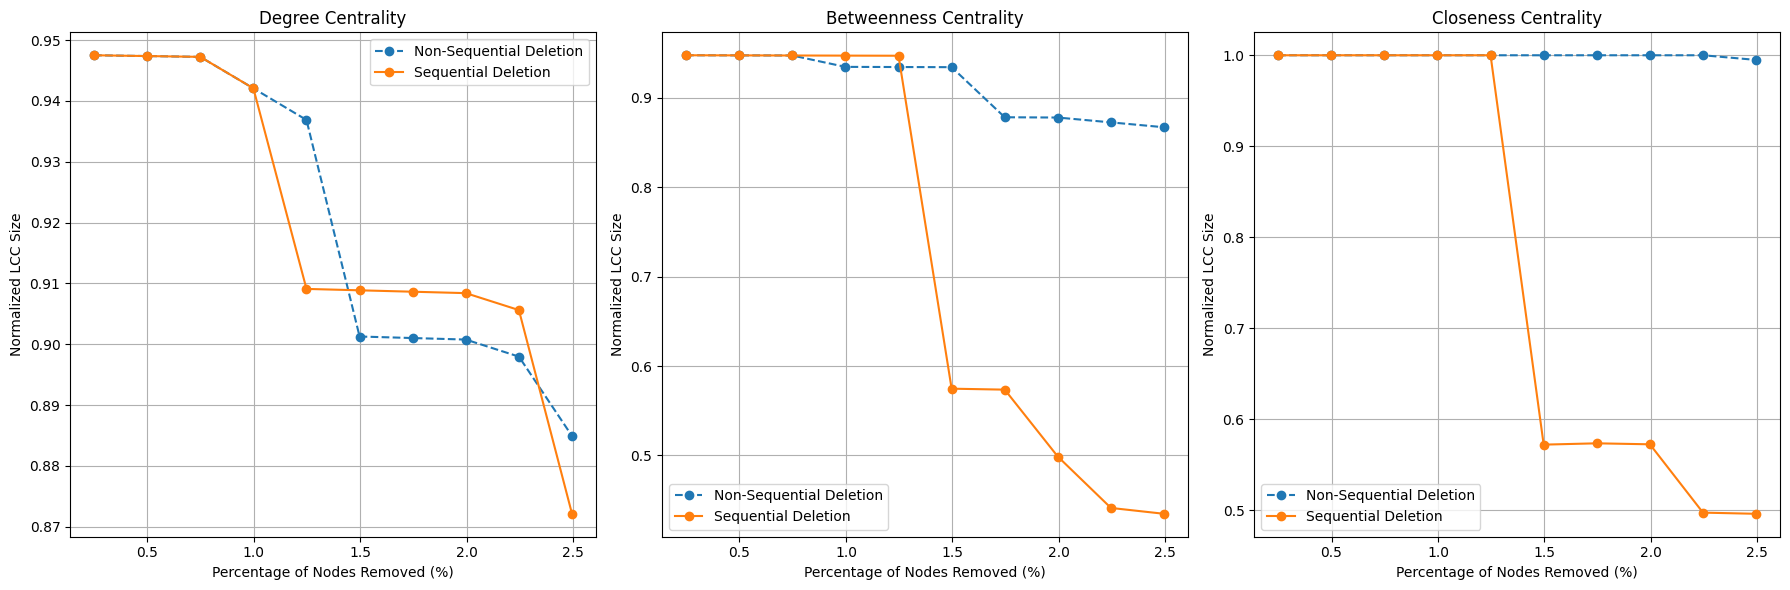

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# 读取图形数据
G = nx.read_graphml('london.graph.xml')
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# 计算度中心性并设置为节点属性
deg_london = nx.degree_centrality(G)
nx.set_node_attributes(G, deg_london, 'degree')

# 计算介数中心性并设置为节点属性
betw_london = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betw_london, 'betweenness')

# 计算接近中心性并设置为节点属性
closeness_london = nx.closeness_centrality(G)
nx.set_node_attributes(G, closeness_london, 'closeness')

def calculate_normalized_lcc(graph):
    if len(graph) == 0:
        return 0
    largest_cc = max(nx.connected_components(graph), key=len)
    return len(largest_cc) / len(graph.nodes())

def unordered_deletion(graph, sorted_nodes, n=10):
    graph_copy = graph.copy()
    results = []
    for i, node in enumerate(sorted_nodes[:n]):
        graph_copy.remove_node(node)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / len(graph) * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def sequential_deletion(graph, centrality, n=10):
    graph_copy = graph.copy()
    results = []
    for i in range(n):
        centrality_dict = centrality(graph_copy)
        sorted_nodes = sorted(centrality_dict, key=centrality_dict.get, reverse=True)
        node_to_remove = sorted_nodes[0]
        graph_copy.remove_node(node_to_remove)
        normalized_lcc = calculate_normalized_lcc(graph_copy)
        removed_percentage = (i + 1) / len(graph) * 100
        results.append((removed_percentage, normalized_lcc))
    return results

def plot_results_subplot(unordered_results_deg, sequential_results_deg,
                         unordered_results_betw, sequential_results_betw,
                         unordered_results_close, sequential_results_close):
    plt.figure(figsize=(18, 6))  # 设置整体图形尺寸

    # 绘制度中心性结果
    plt.subplot(1, 3, 1)
    plot_results_combined(unordered_results_deg, sequential_results_deg, 'Degree Centrality')

    # 绘制介数中心性结果
    plt.subplot(1, 3, 2)
    plot_results_combined(unordered_results_betw, sequential_results_betw, 'Betweenness Centrality')

    # 绘制接近中心性结果
    plt.subplot(1, 3, 3)
    plot_results_combined(unordered_results_close, sequential_results_close, 'Closeness Centrality')

    plt.tight_layout()
    plt.show()

def plot_results_combined(unordered_results, sequential_results, title):
    unordered_removed_percentages = [res[0] for res in unordered_results]
    unordered_lcc_sizes = [res[1] for res in unordered_results]
    plt.plot(unordered_removed_percentages, unordered_lcc_sizes, marker='o', linestyle='--', label='Non-Sequential Deletion')

    sequential_removed_percentages = [res[0] for res in sequential_results]
    sequential_lcc_sizes = [res[1] for res in sequential_results]
    plt.plot(sequential_removed_percentages, sequential_lcc_sizes, marker='o', linestyle='-', label='Sequential Deletion')

    plt.title(title)
    plt.xlabel("Percentage of Nodes Removed (%)")
    plt.ylabel("Normalized LCC Size")
    plt.grid(True)
    plt.legend()

# 计算每种中心性的删除结果
G_copy = G.copy()
unordered_results_deg = unordered_deletion(G_copy, sorted(deg_london, key=deg_london.get, reverse=True), n=10)
sequential_results_deg = sequential_deletion(G_copy, nx.degree_centrality, n=10)

G_copy = G.copy()
unordered_results_betw = unordered_deletion(G_copy, sorted(betw_london, key=betw_london.get, reverse=True), n=10)
sequential_results_betw = sequential_deletion(G_copy, nx.betweenness_centrality, n=10)

G_copy = G.copy()
unordered_results_close = unordered_deletion(G_copy, sorted(closeness_london, key=closeness_london.get, reverse=True), n=10)
sequential_results_close = sequential_deletion(G_copy, nx.closeness_centrality, n=10)

# 绘制结果
plot_results_subplot(unordered_results_deg, sequential_results_deg,
                     unordered_results_betw, sequential_results_betw,
                     unordered_results_close, sequential_results_close)
